# Hierarchical Clustering

In this lab, you will see how to use **hierarchical clustering**.

## Imports

In [14]:
from IPython.display import SVG

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, cut_tree
import seaborn as sns

In [16]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

In [17]:
# !pip install scikit-network

In [18]:
from sknetwork.data import karate_club, load_netset
from sknetwork.embedding import Spectral
from sknetwork.utils import get_degrees
from sknetwork.visualization import svg_graph, svg_dendrogram

## Iris dataset

We start with the Iris dataset.

In [19]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = list(iris.target_names)

In [20]:
# hierarchical clustering
Z = linkage(X, method='ward')

In [21]:
Z.shape

(149, 4)

In [22]:
Z[:,[0,1,3]].astype(int)

array([[101, 142,   2],
       [  7,  39,   2],
       [  0,  17,   2],
       [  9,  34,   2],
       [128, 132,   2],
       [ 10,  48,   2],
       [  4,  37,   2],
       [ 19,  21,   2],
       [ 29,  30,   2],
       [ 57,  93,   2],
       [ 80,  81,   2],
       [116, 137,   2],
       [  8,  38,   2],
       [  3,  47,   2],
       [ 27,  28,   2],
       [ 82,  92,   2],
       [ 95,  96,   2],
       [127, 138,   2],
       [  1,  45,   2],
       [ 63,  91,   2],
       [ 65,  75,   2],
       [ 40, 152,   3],
       [123, 126,   2],
       [ 49, 151,   3],
       [112, 139,   2],
       [ 94,  99,   2],
       [ 12, 168,   3],
       [ 88, 166,   3],
       [ 66,  84,   2],
       [ 23,  26,   2],
       [ 53,  89,   2],
       [ 74,  97,   2],
       [ 25, 153,   3],
       [ 46, 157,   3],
       [  2, 163,   3],
       [110, 147,   2],
       [120, 143,   2],
       [136, 148,   2],
       [ 78, 169,   3],
       [ 69, 160,   3],
       [ 54,  58,   2],
       [140, 144

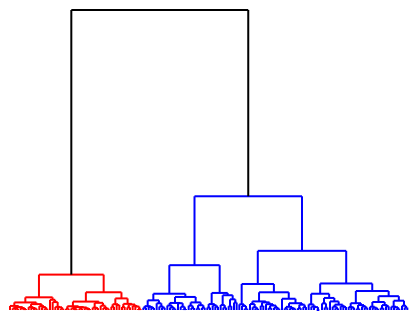

In [23]:
SVG(svg_dendrogram(Z))

## To do

* What are the two first flowers merged? Compare their features.
* Give the first 2 clusters. Show the contingency matrix and give the ARI / AMI scores.
* Give the first 3 clusters. Show the contingency matrix, give the ARI / AMI scores and compare with K-Means.
* Test other linkages.

In [24]:
# - What are the two first flowers merged? Compare their features 
first_flowers=Z[0,0].astype(int)
second_flowers=Z[0,1].astype(int)
print(f'The two first flowers merged are {first_flowers} and {second_flowers}')

The two first flowers merged are 101 and 142


----ARI for 2 cluster for hierarchical clustering----


NameError: name 'ari' is not defined

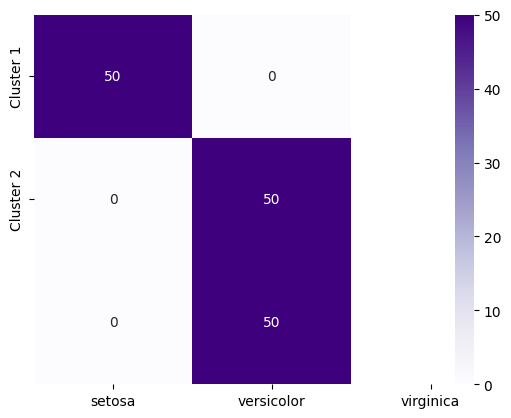

In [25]:
# - Give the first 2 clusters. Show the contingency matrix and give the ARI / AMI scores
clusters_2 = cut_tree(Z, n_clusters=2).ravel()
contingency_2 = contingency_matrix(y, clusters_2)
sns.heatmap(contingency_2, annot=True, cmap='Purples', xticklabels=label_names, yticklabels=['Cluster 1', 'Cluster 2'])

ari_2 = adjusted_rand_score(y, clusters_2)
ami_2 = adjusted_mutual_info_score(y, clusters_2)
print('----ARI for 2 cluster for hierarchical clustering----')
print(ari_2)
print('----AMI for 2 cluster for hierarchical clustering----')
print(ami_2)

----ARI for 3 cluster for hierarchical clustering----
0.7311985567707746
----AMI for 3 cluster for hierarchical clustering----
0.7671669615713114


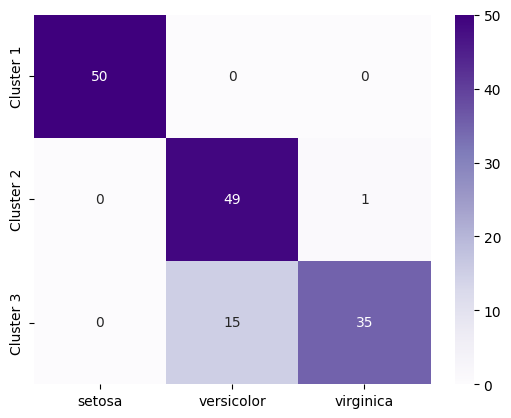

In [ ]:
# Give the first 3 clusters. Show the contingency matrix, give the ARI / AMI scores and compare with K-Means.

clusters_3 = cut_tree(Z, n_clusters=3).ravel()
contingency_3 = contingency_matrix(y, clusters_3)
sns.heatmap(contingency_3, annot=True, cmap='Purples', xticklabels=label_names, yticklabels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

ari_3 = adjusted_rand_score(y, clusters_3)
ami_3 = adjusted_mutual_info_score(y, clusters_3)
print('----ARI for 3 cluster for hierarchical clustering----')
print(ari_3)
print('----AMI for 3 cluster for hierarchical clustering----')
print(ami_3)


In [ ]:
# K-Means clustering

# Perform K-Means clustering for comparison
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_clusters = kmeans.labels_

# Contingency matrix for K-Means
contingency_kmeans = contingency_matrix(y, kmeans_clusters)

# ARI and AMI for K-Means
ari_kmeans = adjusted_rand_score(y, kmeans_clusters)
ami_kmeans = adjusted_mutual_info_score(y, kmeans_clusters)

# Display contingency matrix for hierarchical clustering (3 clusters)
plt.figure(figsize=(12, 5))

print('----ARI for 3 cluster for K-means----')
print(ari_kmeans)
print('----AMI for 3 cluster for K-means----')
print(ari_kmeans)

----ARI for 3 cluster for K-means----
0.7302382722834697
----AMI for 3 cluster for K-means----
0.7302382722834697


/Users/laurentgayraud/Desktop/Machine_Learning/TP/TP4-Graph (1)/env_tp_graph/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 1200x500 with 0 Axes>

In [ ]:
# Test other linkage methods
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median']
for method in methods:
    Z = linkage(X, method=method)
    y_pred = cut_tree(Z, n_clusters=3).T[0]
    ARI = adjusted_rand_score(y, y_pred)
    AMI = adjusted_mutual_info_score(y, y_pred)
    print(f"{method} : ARI = {ARI}, AMI = {AMI}")

# Find the best method
best_method = None
best_ARI = 0
best_AMI = 0

for method in methods:
    Z = linkage(X, method=method)
    y_pred = cut_tree(Z, n_clusters=3).T[0]
    ARI = adjusted_rand_score(y, y_pred)
    AMI = adjusted_mutual_info_score(y, y_pred)
    if ARI > best_ARI and AMI > best_AMI:
        best_method = method
        best_ARI = ARI
        best_AMI = AMI

print(f"Best method : {best_method}, ARI = {best_ARI}, AMI = {best_AMI}")

single : ARI = 0.5637510205230709, AMI = 0.7125764811325074
complete : ARI = 0.6422512518362898, AMI = 0.7184641371994781
average : ARI = 0.7591987071071522, AMI = 0.8032287370935435
weighted : ARI = 0.7455038681804481, AMI = 0.7954205025674187


centroid : ARI = 0.7591987071071522, AMI = 0.8032287370935435
median : ARI = 0.5681159420289855, AMI = 0.7315847607219572
Best method : average, ARI = 0.7591987071071522, AMI = 0.8032287370935435


## To do

* Complete the function ``get_n_clusters`` below, that returns relevant cuts of the dendrogram.
* Select the 2 best clusterings of the Iris dataset.
* Compare with $k$-means.

In [ ]:
def get_n_clusters(Z):
    '''Return the list of numbers of clusters in decreasing order of height gaps. 
    
    Parameters
    ----------
    Z : np.ndarray
        Dendrogram
    Returns
    -------
    n_clusters : np.ndarray
        Numbers of clusters.
    '''
    # Calculate the gaps in heights
    heights = Z[:, 2]
    # Differences in consecutive linkage heights
    height_diffs = np.diff(heights)
    
    # Find indices of the sorted differences, in descending order (largest gaps first)
    sorted_idx = np.argsort(height_diffs)[::-1]
    
    # Convert indices to number of clusters, considering the nature of dendrogram construction
    # The number of clusters changes from N to N-1, N-2, ..., for each merge step
    n_clusters = len(Z) - sorted_idx
    
    return n_clusters

n_clusters = get_n_clusters(Z)
print(n_clusters)



[  2   3   6   7  11 149   9   5   8  20   4 144  33  31  15  22  60  25
  24  23  16  44  42  26  21  35  14 118  43 114  46  88 124  84 109 103
 127  13  36  47 131  18 121  68  58  99  30 105  29  69 128  74  77  28
 120  56  72  55  95  63  94  85  53  82  75 125  54  19  51  17  40 106
  37  62  98  64  50  71  39  86  49  59  83  80  76  41  48  73  57 104
  79  78  65 111 110  52  27  38 126 102 117 145 108 116 100  93 148 122
  89  96 123 119 101  87  92 138  91  81 137  67  97  66 112  70 146 130
  90 147 143 142 129 113 107 115 141 140 139 136 135 134 133  45 132  10
  61  34  32  12]


In [ ]:
# K-Means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(X)
clusters_kmeans_3 = kmeans_3.labels_

# ARI and AMI for K-Means with 3 clusters
ari_kmeans_3 = adjusted_rand_score(y, clusters_kmeans_3)
ami_kmeans_3 = adjusted_mutual_info_score(y, clusters_kmeans_3)

# K-Means clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(X)
clusters_kmeans_2 = kmeans_2.labels_

# ARI and AMI for K-Means with 2 clusters
ari_kmeans_2 = adjusted_rand_score(y, clusters_kmeans_2)
ami_kmeans_2 = adjusted_mutual_info_score(y, clusters_kmeans_2)

# Compile the results
comparison_results = {
    "Hierarchical Clustering (3 Clusters)": {"ARI": ari_3, "AMI": ami_3},
    "K-Means (3 Clusters)": {"ARI": ari_kmeans_3, "AMI": ami_kmeans_3},
    "Hierarchical Clustering (2 Clusters)": {"ARI": ari_2, "AMI": ami_2},
    "K-Means (2 Clusters)": {"ARI": ari_kmeans_2, "AMI": ami_kmeans_2}
}

comparison_results


/Users/laurentgayraud/Desktop/Machine_Learning/TP/TP4-Graph (1)/env_tp_graph/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/laurentgayraud/Desktop/Machine_Learning/TP/TP4-Graph (1)/env_tp_graph/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'Hierarchical Clustering (3 Clusters)': {'ARI': 0.7311985567707746,
  'AMI': 0.7671669615713114},
 'K-Means (3 Clusters)': {'ARI': 0.7302382722834697,
  'AMI': 0.7551191675800484},
 'Hierarchical Clustering (2 Clusters)': {'ARI': 0.5681159420289855,
  'AMI': 0.7315847607219572},
 'K-Means (2 Clusters)': {'ARI': 0.5399218294207123,
  'AMI': 0.6538380713762777}}

Les meilleurs clusterings sont 2 puis 3.

## Karate Club

We now consider the [Karate Club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) graph. The Ward method is applied to the spectral embedding of the graph.

In [ ]:
graph = karate_club(metadata=True)

In [ ]:
adjacency = graph.adjacency
labels = graph.labels
position = graph.position

In [ ]:
SVG(svg_graph(adjacency, position, labels=labels))

## To do

* Apply hierarchical clustering to the spectral embedding in dimension 3.
* Display the dendrogram.
* Display the best clustering.
* Compute the ARI / AMI scores.
* Compare with k-means (with the same number of clusters).

In [ ]:
spectral = Spectral(n_components=3)
X = spectral.fit_transform(adjacency)

In [ ]:
Z = linkage(X, method='ward')

In [ ]:
SVG(svg_dendrogram(Z))

## Wikipedia

Finally, we consider a small subset of Wikipedia called [Wikipedia for Schools](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools). Each article is encoded by the words used in the summary of this article.

In [ ]:
dataset = load_netset('wikischools')

In [ ]:
adjacency = dataset.adjacency
features = dataset.biadjacency
names = dataset.names
words = dataset.names_col
labels = dataset.labels
names_labels = dataset.names_labels

In [ ]:
i = 100
names[i]

In [ ]:
# label
names_labels[labels[i]]

In [ ]:
# words
words[features[i].indices]

In [ ]:
# number of incoming links
in_degrees = get_degrees(adjacency, transpose=True)
in_degrees[i]

In [ ]:
spectral = Spectral(n_components=20)
X = spectral.fit_transform(features)

## To do

* Apply hierarchical clustering to the spectral embedding in dimension 20.
* Select the best clustering and compare with the ground-truth in terms of ARI / AMI.
* Select the clustering with 20 clusters and list the top 5 articles of each cluster (in terms of number of incoming links).